<a href="https://colab.research.google.com/github/JosueDuenas1995/Python_Data_Alura/blob/main/ejercicio_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Un colega del equipo de datos de Zoop solicitó el análisis de otro conjunto de datos además del enviado por la dirección. Estos datos se refieren a las ventas totales obtenidas por 896 franquicias en el primer mes del trimestre de análisis de Zoop.

Observación: Durante los desafíos del curso, para reforzar el contenido, nos enfocaremos en nuestros análisis en la base de datos enviada por el equipo de datos. Ya durante los videos trabajaremos con la base de datos enviada por la dirección. Así, podremos contribuir significativamente a la evaluación trimestral de Zoop.

Para acceder a los datos, puedes usar el siguiente código con el enlace abajo:



```
# url_franquicias = 'https://gist.githubusercontent.com/ahcamachod/68eede222bdf1ba0ca413d529e800e7c/raw/576b0f3856467817df0fcf041d4a0787579917b0/ventas_franquicia.json'
```

Sabiendo esto, vamos al desafío:

Con la ayuda de ChatGPT, busca recolectar y acceder a los datos del archivo que están en formato JSON. Es importante dejar todos los datos de manera accesible, evitando estructuras que recuerden a un archivo JSON, como diccionarios.

Diccionario de datos: ventas_franquicia.json

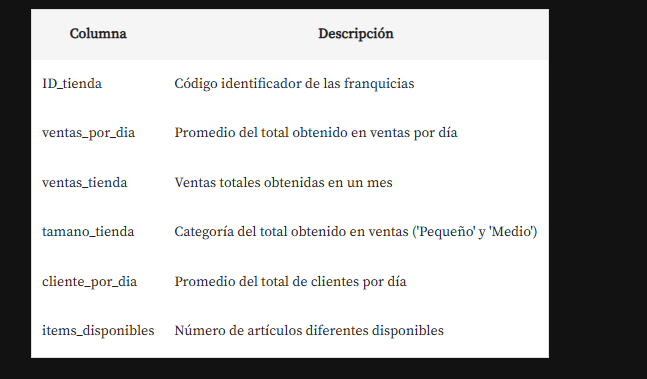



# respuesta

In [7]:
import pandas as pd
import numpy as np
import requests  # Para hacer la solicitud HTTP

url_franquicias = 'https://gist.githubusercontent.com/ahcamachod/68eede222bdf1ba0ca413d529e800e7c/raw/576b0f3856467817df0fcf041d4a0787579917b0/ventas_franquicia.json'

response = requests.get(url_franquicias)
data = response.json()

df = pd.DataFrame(data)

# Para una mejor visualización de los datos eliminamos el print
df

,ID_tienda,ventas,tienda
0,OUT431,"{'ventas_por_dia': None, 'ventas_tienda': 8222...","{'tamano_tienda': 'pequeno', 'cliente_por_dia'..."
1,OUT738,"{'ventas_por_dia': None, 'ventas_tienda': 1032...","{'tamano_tienda': 'medio', 'cliente_por_dia': ..."
2,OUT426,"{'ventas_por_dia': None, 'ventas_tienda': 5548...","{'tamano_tienda': 'pequeno', 'cliente_por_dia'..."
3,OUT948,"{'ventas_por_dia': None, 'ventas_tienda': 9641...","{'tamano_tienda': 'Pequeno', 'cliente_por_dia'..."
4,OUT139,"{'ventas_por_dia': None, 'ventas_tienda': 5680...","{'tamano_tienda': 'Pequeno', 'cliente_por_dia'..."
...,...,...,...
893,OUT206,"{'ventas_por_dia': None, 'ventas_tienda': 8787...","{'tamano_tienda': 'medio', 'cliente_por_dia': ..."
894,OUT370,"{'ventas_por_dia': None, 'ventas_tienda': 2941...","{'tamano_tienda': 'Pequeno', 'cliente_por_dia'..."
895,OUT960,"{'ventas_por_dia': None, 'ventas_tienda': 5736...","{'tamano_tienda': 'Pequeno', 'cliente_por_dia'..."
896,OUT535,"{'ventas_por_dia': None, 'ventas_tienda': 6158...","{'tamano_tienda': 'pequeno', 'cliente_por_dia'..."


In [8]:
# Usa pd.json_normalize para expandir las columnas con diccionarios
df_ventas = pd.json_normalize(df['ventas'])
df_tienda = pd.json_normalize(df['tienda'])

# Concatena los DataFrames resultantes al DataFrame original
df = pd.concat([df, df_ventas, df_tienda], axis=1)

# Elimina las columnas originales "vendas" y "loja" si es necesario
df = df.drop(['ventas', 'tienda'], axis=1)

# Muestra el DataFrame resultante
df.head()

,ID_tienda,ventas_por_dia,ventas_tienda,tamano_tienda,cliente_por_dia,items_disponibles
0,OUT431,NaN,82220.053714,pequeno,330.0,1968
1,OUT738,NaN,103231.728424,medio,310.0,2189
2,OUT426,NaN,55487.996318,pequeno,870.0,1736
3,OUT948,NaN,96417.999686,Pequeno,1560.0,1099
4,OUT139,NaN,56809.025487,Pequeno,10.0,1516


In [9]:
df.head()

,ID_tienda,ventas_por_dia,ventas_tienda,tamano_tienda,cliente_por_dia,items_disponibles
0,OUT431,NaN,82220.053714,pequeno,330.0,1968
1,OUT738,NaN,103231.728424,medio,310.0,2189
2,OUT426,NaN,55487.996318,pequeno,870.0,1736
3,OUT948,NaN,96417.999686,Pequeno,1560.0,1099
4,OUT139,NaN,56809.025487,Pequeno,10.0,1516


Aquí están los pasos que estamos realizando:

1 - Usamos pd.json_normalize() para expandir los diccionarios en las columnas "ventas" y "tienda" en DataFrames separados df_ventas y df_tienda.

2 - Luego, usamos pd.concat() para concatenar estos DataFrames expandidos con el DataFrame original df a lo largo del eje de las columnas (axis=1).

3 - Si no deseas mantener las columnas originales "ventas" y "tienda", puedes descartarlas usando df.drop().

Ahora, tu DataFrame df debería contener columnas adicionales con los datos extraídos de los diccionarios en las columnas "ventas" y "tienda", haciéndolos más accesibles para el análisis. Asegúrate de adaptar las columnas extraídas según la estructura real de los diccionarios en tus columnas "ventas" y "tienda".

Usando el código sugerido, obtenemos el siguiente resultado:

8.png

Con esto conseguimos recolectar y acceder a los datos proporcionados por el equipo de datos.

# Ejercicio 2

Continuaremos los desafíos con otro conjunto de datos de Zoop.

En el último desafío, logramos acceder a los datos y tener acceso a todas las columnas de información. Ahora es el momento de poner en práctica la etapa de exploración de datos, enfocada en la comprensión de los datos y la búsqueda de inconsistencias.

Por lo tanto, vamos al desafío:

Con la ayuda de ChatGPT, realiza el estudio de los datos presentes en cada columna del conjunto de datos e identifica las inconsistencias que puedan estar presentes, como datos ausentes o filas duplicadas.

In [10]:
df.describe()


,ventas_por_dia,ventas_tienda,cliente_por_dia,items_disponibles
count,1.00000,898.000000,880.000000,898.000000
mean,4294.64706,71071.894236,786.443182,1781.561247
std,NaN,22143.481947,267.038209,299.716498
min,4294.64706,19371.958539,10.000000,932.000000
25%,4294.64706,54510.922957,600.000000,1574.500000
50%,4294.64706,69228.128375,780.000000,1773.000000
75%,4294.64706,86119.754844,970.000000,1982.000000
max,4294.64706,152897.262005,1560.000000,2667.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_tienda          898 non-null    object 
 1   ventas_por_dia     1 non-null      float64
 2   ventas_tienda      898 non-null    float64
 3   tamano_tienda      878 non-null    object 
 4   cliente_por_dia    880 non-null    float64
 5   items_disponibles  898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [12]:
df.duplicated().sum()

np.int64(2)

In [13]:
df.isnull().sum()

,0
ID_tienda,0
ventas_por_dia,897
ventas_tienda,0
tamano_tienda,20
cliente_por_dia,18
items_disponibles,0


In [14]:
df.nunique()

,0
ID_tienda,896
ventas_por_dia,1
ventas_tienda,896
tamano_tienda,3
cliente_por_dia,130
items_disponibles,616


In [15]:
df['tamano_tienda'].unique()

array(['pequeno', 'medio', 'Pequeno', None], dtype=object)

Resumen de la exploración:

Al realizar este análisis, encontramos las siguientes inconsistencias que deben ser tratadas:

Filas duplicadas.
Valores ausentes.
Datos categóricos fuera de estándar.
Datos numéricos del tipo int definidos como float.
Este resumen nos ayudará a tener claridad sobre las áreas que requieren tratamiento en las próximas etapas del análisis.

# EJERCICIO 3

En el último desafío se realizó la exploración de los datos e identificación de inconsistencias que existen dentro de ellos. Para avanzar en el proyecto, necesitaremos abordar el tratamiento de estas inconsistencias, ya que podrían interferir en un análisis futuro.

Sabiendo esto, este desafío consiste en:

Ejecutar la limpieza y tratamiento de los datos con la ayuda de ChatGPT, buscando definir soluciones posibles que sean aplicables a los datos. No olvides siempre tener en cuenta el contexto en el que estamos inmersos.

In [16]:
# Elimine las líneas duplicadas del DataFrame
df = df.drop_duplicates()

# Verifique nuevamente si existen valores duplicados después de la eliminación
df.duplicated().sum()

np.int64(0)

In [17]:
# Elimine las líneas duplicadas del DataFrame
df = df.drop_duplicates()

# Verifique nuevamente si existen valores duplicados después de la eliminación
df.duplicated().sum()

np.int64(0)

In [18]:
df = df.drop('ventas_por_dia', axis=1)

In [19]:
df['tamano_tienda'].fillna('Desconocido', inplace=True)

<ipython-input-19-aa1f0d82d792>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tamano_tienda'].fillna('Desconocido', inplace=True)


In [20]:
df['tamano_tienda'].fillna(df['tamano_tienda'].mode()[0], inplace=True)

In [21]:
media_cliente_por_dia = df['cliente_por_dia'].mean()
df['cliente_por_dia'].fillna(media_cliente_por_dia, inplace=True)

<ipython-input-21-f139f1ed0eb9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cliente_por_dia'].fillna(media_cliente_por_dia, inplace=True)


In [23]:
df.isnull().sum()

,0
ID_tienda,0
ventas_tienda,0
tamano_tienda,0
cliente_por_dia,0
items_disponibles,0


In [24]:
# Reemplace los valores inconsistentes en la columna "tamano_tienda"
df['tamano_tienda'].replace({'pequeno': 'Pequeño', 'Pequeno': 'Pequeño','medio':'Medio'}, inplace=True)

# Ahora, verifique nuevamente los valores únicos en la columna "tamano_tienda"
df['tamano_tienda'].unique()

array(['Pequeño', 'Medio', 'Desconocido'], dtype=object)

In [25]:
# Convierte la columna "cliente_por_dia" al tipo entero (int)
df['cliente_por_dia'] = df['cliente_por_dia'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 0 to 897
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_tienda          896 non-null    object 
 1   ventas_tienda      896 non-null    float64
 2   tamano_tienda      896 non-null    object 
 3   cliente_por_dia    896 non-null    int64  
 4   items_disponibles  896 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 42.0+ KB


#  parte FINAL

Limpiamos y tratamos nuestros datos en el último desafío, ahora vamos a avanzar aún más en el proyecto iniciando la etapa de visualización. Con ella, al igual que hicimos en el video, podemos contribuir con el equipo de datos presentando, además de lo que descubrimos de nuestros datos, una opción de visualización que pueda ser incluida en el informe.

El desafío consiste en crear una visualización que nos brinde información sobre nuestros datos. Siéntete libre de elegir y construir una visualización que creas que tiene sentido, pero una sugerencia es utilizar el ChatGPT para ayudarte con ideas que puedas aplicar.

Recuerda que es importante mantener la identidad visual de Zoop, así que utiliza sus colores en la construcción de la imagen.

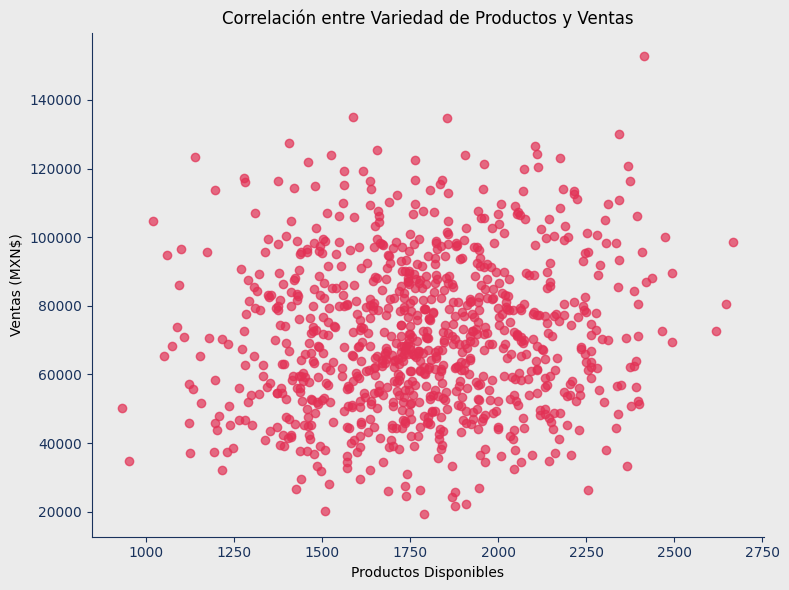

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Colores
color_fondo = "#ebebeb"
color_puntos = "#e23155"

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor(color_fondo)
ax.set_facecolor(color_fondo)

# Graficar el gráfico de dispersión
ax.scatter(df['items_disponibles'], df['ventas_tienda'], color=color_puntos, alpha=0.7)

# Configuraciones adicionales
ax.set_xlabel('Productos Disponibles')
ax.set_ylabel('Ventas (MXN$)')
ax.set_title('Correlación entre Variedad de Productos y Ventas')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("#19325c")  # Color del eje X
ax.spines['left'].set_color("#19325c")    # Color del eje Y
ax.tick_params(axis='x', colors="#19325c")  # Color de los ticks en el eje X
ax.tick_params(axis='y', colors="#19325c")  # Color de los ticks en el eje Y

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La visualización está bastante alineada con la identidad de Zoop, lo cual es positivo.

Observamos que este gráfico de dispersión logra mostrar que las ventas en las franquicias se concentran en una cantidad de productos únicos que varía entre 1,250 y 2,250, además de la concentración del total de ventas entre 30,000 y 120,000 reales.

Esta visualización no resultó tan interesante por dos razones:

Un público menos familiarizado con los datos tendrá dificultades para extraer información útil de esta visualización.
Esta información que descubrimos podría haberse verificado mediante dos histogramas.
Vamos a comprobar si la sugerencia 3 de ChatGPT nos ofrece algo más aprovechable.

Prompt:

El DataFrame "df" contiene la columna "cliente_por_dia", que indica el promedio de frecuencia de clientes durante un mes por varias franquicias.

Además, en "df", tenemos la columna "tamano_tienda" con 3 categorías de tamaño para las tiendas: 'Medio', 'Pequeño' y 'No registrado'.

Deseo crear una visualización que permita identificar si hay alguna diferencia en el número promedio de clientes entre las tiendas pequeñas y medianas, representado en un gráfico de barras.

La figura de la trama debe seguir la identidad visual de la tienda, con el fondo de la figura y de la trama en el color "#ebebeb" y las barras en el color "#e23155".

Además, es necesario mostrar la cantidad total de clientes por encima de cada barra, con el texto de esa información en el color "#19325c" y la estructura "valor clientes". Utilice las bibliotecas de visualización de datos de Python para crear esta visualización.

Resultado:

Para crear un gráfico de barras que permita identificar la diferencia en el número promedio de clientes entre tiendas pequeñas y medianas en el DataFrame "df" con las especificaciones de diseño proporcionadas, puede utilizar la biblioteca matplotlib. Aquí hay un código Python que realiza esta tarea:

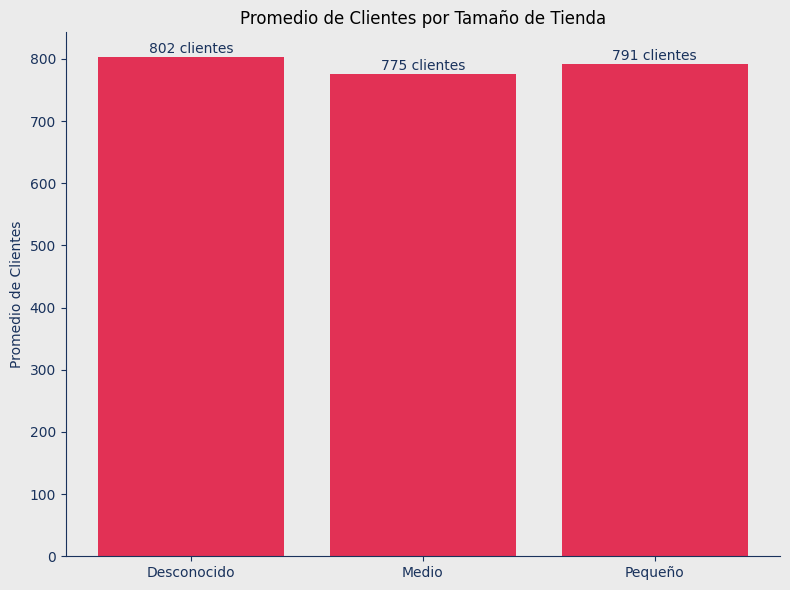

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Colores
cor_fondo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor(cor_fondo)
ax.set_facecolor(cor_fondo)

# Agrupar los datos por tamaño de tienda y calcular el promedio de clientes para cada categoría
df_agrupado = df.groupby('tamano_tienda')['cliente_por_dia'].mean().reset_index()

# Graficar las barras
barras = ax.bar(df_agrupado['tamano_tienda'], df_agrupado['cliente_por_dia'], color=cor_barras)

# Añadir el valor del promedio de clientes sobre cada barra
for bar in barras:
    altura_barra = bar.get_height()
    valor_media_clientes = altura_barra
    ax.annotate(f'{valor_media_clientes:.0f} clientes', xy=(bar.get_x() + bar.get_width() / 2, altura_barra),
                xytext=(0, 3), textcoords='offset points', ha='center', color=cor_texto)

# Configuraciones adicionales
ax.set_ylabel('Promedio de Clientes')
ax.set_title('Promedio de Clientes por Tamaño de Tienda')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.xaxis.label.set_color(cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.grid(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Este código crea un gráfico de barras con las especificaciones de diseño proporcionadas, incluyendo los colores de las barras y del texto. Permite visualizar la diferencia en el promedio de clientes entre las tiendas pequeñas y medianas. Asegúrese de reemplazar "df" por su DataFrame real y ajustar las configuraciones según sea necesario. Aplicando el código sugerido, obtenemos el siguiente resultado: